# Kasra Samadi 993623030

In [32]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
%matplotlib inline

### reading train.csv and test.csv
#### define train and test dataFrames

In [33]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [34]:
df_train

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.33,0.00,0.67,0.0,0.22,0.00,0.00,0.00,0.44,0.11,...,0.000,0.157,0.000,0.392,0.176,0.078,2.606,75,391,1
1,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.145,0.291,0.000,2.500,11,45,1
2,0.08,0.08,0.76,0.0,0.85,1.02,0.25,0.17,0.59,0.08,...,0.000,0.065,0.000,0.403,0.117,0.013,7.484,669,1407,1
3,0.05,0.05,0.40,0.0,0.34,0.00,0.00,0.00,0.57,0.05,...,0.019,0.099,0.000,0.099,0.079,0.009,4.881,95,1313,1
4,0.00,0.00,0.84,0.0,0.56,0.00,0.00,0.56,0.00,0.00,...,0.000,0.278,0.000,0.046,0.000,0.000,1.661,6,118,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.595,0.000,0.000,1.500,4,15,0
3676,0.00,0.00,0.66,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.104,0.209,0.104,0.000,0.000,2.152,17,127,0
3677,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.208,0.671,0.092,0.000,0.000,0.000,4.122,20,540,0
3678,0.00,0.00,0.00,0.0,0.00,0.60,0.00,0.00,0.00,0.60,...,0.094,0.000,0.000,0.094,0.189,0.000,1.976,15,83,0


In [35]:
df_test

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.0,0.0,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.00,0.00,0.00,0.0,0.00,0.00,0.96,0.0,0.0,1.92,...,0.000,0.000,0.0,0.462,0.000,0.000,1.312,6,21,1
2,0.00,0.42,0.42,0.0,1.27,0.00,0.42,0.0,0.0,1.27,...,0.000,0.063,0.0,0.572,0.063,0.000,5.659,55,249,1
3,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,0.000,0.000,0.0,1.975,0.370,0.000,35.461,95,461,1
4,0.00,0.00,0.55,0.0,1.11,0.00,0.18,0.0,0.0,0.00,...,0.000,0.182,0.0,0.455,0.000,0.000,1.320,4,70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,0.14,0.00,0.14,0.0,0.00,0.56,0.00,0.0,0.0,0.00,...,0.000,0.053,0.0,0.000,0.000,0.000,1.136,5,108,0
917,0.67,0.00,0.00,0.0,0.67,0.00,0.00,0.0,0.0,0.00,...,0.000,0.290,0.0,0.000,0.000,0.096,2.432,15,90,0
918,0.00,0.00,0.18,0.0,0.18,0.18,0.00,0.0,0.0,0.00,...,0.033,0.033,0.0,0.099,0.000,0.000,1.489,11,137,0
919,0.00,0.00,1.20,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,0.000,0.000,0.0,0.000,0.000,0.000,1.200,3,24,0


#### check null values in each test and train dataFrames

In [36]:
print(df_train.isna().sum())
print(df_test.isna().sum())

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

### define x_train , y_train , x_test and y_test
#### separate y_train from x_train and y_test from x_test   

In [37]:
y_train = df_train["Class"]
y_test = df_test["Class"]
x_train = df_train.drop(["Class"], axis=1)
x_test = df_test.drop(["Class"], axis=1)

### evaluation faunction
#### calculate accuracy score, f1 score precision score and recall score from y_true and y_prediction

In [38]:
def evaluate_func(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    prec = precision_score(y_true, y_pred, average='weighted')
    rec = recall_score(y_true, y_pred, average='weighted')
    print(f'Accuracy: {acc:.6f}')
    print(f'Recall: {rec:.6f}')
    print(f'Precision: {prec:.6f}')
    print(f'F1-score: {f1:.6f}')

### Logistic regression without any sampling or weighted loss function
#### In this cell we define LogisticRegression and fitted it with x_train and y_train. after that predict with x_test and print the result of evaluate_func with y_test for y_true and y_pred for y_prediction.
#### Here we get ConvergenceWarning, because the given dataset is imbalanced 

In [39]:
LR = LogisticRegression(solver='liblinear').fit(x_train,y_train)
y_pred = LR.predict(x_test)
print('Logistic regression without any sampling or weighted loss function:')
evaluate_func(y_test, y_pred)

Logistic regression without any sampling or weighted loss function:
Accuracy: 0.916395
Recall: 0.916395
Precision: 0.916252
F1-score: 0.916068


C:\Users\KASRA\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### confusion_matrix for default LogisticRegression
#### confusion matrix visualizes and summarizes the performance of a classification algorithm
#### True Positive (TP): It is the total counts having both predicted and actual values are 0.
#### True Negative (TN): It is the total counts having both predicted and actual values are 1.
#### False Positive (FP): It is the total counts having prediction is 0 while actually is 1.
#### False Negative (FN): It is the total counts having prediction is 1 while actually, it is 0.


<AxesSubplot:>

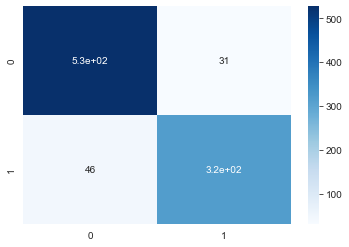

In [40]:
con_matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(con_matrix,annot=True, cmap="Blues")

### Logistic regression with OverSampling
#### In this cell first we define ros as RandomOverSampler with random_state=50 and fit it with x_train and y_train. RandomOverSampling involves randomly selecting examples from the minority class, with replacement, and adding them to the training dataset.
#### Then define LogisticRegression and fitted it with x_train_ros and y_train_ros. after that predict with x_test and print the result of evaluate_func with y_test for y_true and y_pred_ros for y_prediction.   
#### Here we have No ConvergenceWarning, because the dataset is balanced 
#### We have improved in evaluate_func

In [41]:
ros = RandomOverSampler(random_state=50)
x_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)
LR_ros = LogisticRegression(solver='liblinear')
LR_ros.fit(x_train_ros, y_train_ros)
y_pred_ros = LR_ros.predict(x_test)
print('Logistic regression with oversampling:')
evaluate_func(y_test, y_pred_ros)

Logistic regression with oversampling:
Accuracy: 0.928339
Recall: 0.928339
Precision: 0.928278
F1-score: 0.928304


### confusion_matrix for LogisticRegression with OverSampling
#### confusion matrix visualizes and summarizes the performance of a classification algorithm
#### True Positive (TP): It is the total counts having both predicted and actual values are 0.
#### True Negative (TN): It is the total counts having both predicted and actual values are 1.
#### False Positive (FP): It is the total counts having prediction is 0 while actually is 1.
#### False Negative (FN): It is the total counts having prediction is 1 while actually, it is 0.


<AxesSubplot:>

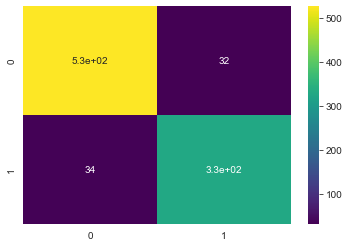

In [42]:
con_matrix=confusion_matrix(y_test, y_pred_ros)
sns.heatmap(con_matrix,annot=True, cmap="viridis")

### Logistic regression with UnderSampling
#### In this cell first we define rus as RandomUnderSampler with random_state=50 and fit it with x_train and y_train. RandomUnderSampling involves randomly selecting examples from the majority class and deleting them from the training dataset
#### Then define LogisticRegression and fitted it with x_train_rus and y_train_rus. after that predict with x_test and print the result of evaluate_func with y_test for y_true and y_pred_rus for y_prediction.   
#### Here we have No ConvergenceWarning, because the dataset is balanced 
#### We have improved in evaluate_func

In [43]:
rus = RandomUnderSampler(random_state=50)
x_train_rus, y_train_rus = rus.fit_resample(x_train, y_train)
LR_rus = LogisticRegression(solver='liblinear')
LR_rus.fit(x_train_rus, y_train_rus)
y_pred_rus = LR_rus.predict(x_test)
print('Logistic regression with undersampling:')
evaluate_func(y_test, y_pred_rus)

Logistic regression with undersampling:
Accuracy: 0.923996
Recall: 0.923996
Precision: 0.924077
F1-score: 0.924032


### confusion_matrix for LogisticRegression with UnderSampling
#### confusion matrix visualizes and summarizes the performance of a classification algorithm
#### True Positive (TP): It is the total counts having both predicted and actual values are 0.
#### True Negative (TN): It is the total counts having both predicted and actual values are 1.
#### False Positive (FP): It is the total counts having prediction is 0 while actually is 1.
#### False Negative (FN): It is the total counts having prediction is 1 while actually, it is 0.

<AxesSubplot:>

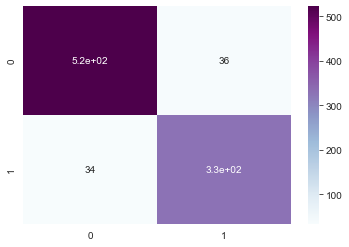

In [44]:
con_matrix=confusion_matrix(y_test, y_pred_rus)
sns.heatmap(con_matrix,annot=True, cmap="BuPu")

### Logistic regression with weighted loss function
#### In this cell first we define wlf as Weighted loss function with LogisticRegression that class_weight='balanced'
#### Then fitted wlf with x_train and y_train. after that predict with x_test and print the result of evaluate_func with y_test for y_true and y_pred_wlf for y_prediction.   
#### Here we have No ConvergenceWarning, because the dataset is balanced 
#### We have improved in evaluate_func

In [45]:
wlf = LogisticRegression(solver='liblinear',class_weight='balanced')
wlf.fit(x_train, y_train)
y_pred_wlf = wlf.predict(x_test)
print('Logistic regression with weighted loss function:')
evaluate_func(y_test, y_pred_wlf)

Logistic regression with weighted loss function:
Accuracy: 0.927253
Recall: 0.927253
Precision: 0.927130
F1-score: 0.927163


### confusion_matrix for LogisticRegression with weighted loss function
#### confusion matrix visualizes and summarizes the performance of a classification algorithm
#### True Positive (TP): It is the total counts having both predicted and actual values are 0.
#### True Negative (TN): It is the total counts having both predicted and actual values are 1.
#### False Positive (FP): It is the total counts having prediction is 0 while actually is 1.
#### False Negative (FN): It is the total counts having prediction is 1 while actually, it is 0.


<AxesSubplot:>

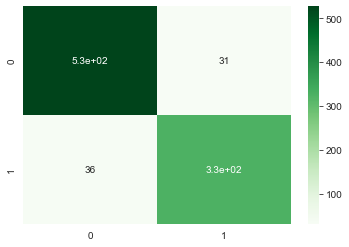

In [46]:
con_matrix=confusion_matrix(y_test, y_pred_wlf)
sns.heatmap(con_matrix,annot=True, cmap="Greens")

### save to csv
#### save the result of 4 predictions
#### y_pred is the prediction for Logistic regression without any sampling or weighted loss function
#### y_pred_ros is the prediction for Logistic regression with OverSampling
#### y_pred_rus is the prediction for Logistic regression with UnderSampling
#### y_pred_wlf is the prediction for LogisticRegression with weighted loss function

In [47]:
y_pred_df=pd.DataFrame(y_pred,columns = ['Class'])
y_pred_df.to_csv("1 default_LogisticRegression.csv",index=False)

In [48]:
y_pred_ros_df=pd.DataFrame(y_pred_ros,columns = ['Class'])
y_pred_ros_df.to_csv("2 oversampling_LogisticRegression.csv",index=False)

In [49]:
y_pred_rus_df=pd.DataFrame(y_pred_rus,columns = ['Class'])
y_pred_rus_df.to_csv("3 undersampling_LogisticRegression.csv",index=False)

In [50]:
y_pred_wlf_df=pd.DataFrame(y_pred_wlf,columns = ['Class'])
y_pred_wlf_df.to_csv("4 weightedLossFunction_LogisticRegression.csv",index=False)